In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model 
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found 
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#Inspect data
inspector = inspect(engine)
inspector.get_table_names()
print(inspector)

columns = inspector.get_columns('measurement')
for column in columns:
    print(columns)


[{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}]
[{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'aut

# Exploratory Climate Analysis

2016-08-23
[(0.0, '2016-08-23'), (0.08, '2016-08-24'), (0.08, '2016-08-25'), (0.0, '2016-08-26'), (0.0, '2016-08-27'), (0.01, '2016-08-28'), (0.0, '2016-08-29'), (0.0, '2016-08-30'), (0.13, '2016-08-31'), (0.0, '2016-09-01'), (0.0, '2016-09-02'), (0.0, '2016-09-03'), (0.03, '2016-09-04'), (None, '2016-09-05'), (None, '2016-09-06'), (0.05, '2016-09-07'), (0.0, '2016-09-08'), (0.03, '2016-09-09'), (0.0, '2016-09-10'), (0.05, '2016-09-11'), (0.0, '2016-09-12'), (0.02, '2016-09-13'), (1.32, '2016-09-14'), (0.42, '2016-09-15'), (0.06, '2016-09-16'), (0.05, '2016-09-17'), (0.0, '2016-09-18'), (0.0, '2016-09-19'), (0.0, '2016-09-20'), (0.0, '2016-09-21'), (0.02, '2016-09-22'), (0.0, '2016-09-23'), (0.0, '2016-09-24'), (0.0, '2016-09-25'), (0.06, '2016-09-26'), (0.02, '2016-09-27'), (0.0, '2016-09-28'), (0.0, '2016-09-29'), (0.0, '2016-09-30'), (0.0, '2016-10-01'), (0.0, '2016-10-02'), (0.0, '2016-10-03'), (0.0, '2016-10-04'), (0.0, '2016-10-05'), (0.0, '2016-10-06'), (0.0, '2016-10-07'), (0.0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version


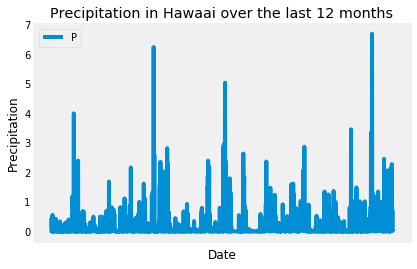

In [11]:
#Design a query to retrieve the last 12 months of precipitation data and plot the results 

# Calculate the date 1 year ago from the last data point in the database

previous_year = dt.date(2017,8,23) - dt.timedelta(days = 365)
print(previous_year)

# Perform a query to retrieve the data and precipitation scores

precipitation = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date >= previous_year).all()
print(precipitation)

# Save the query results as a Pandas DataFrame and set the index to the date column

precp_df = pd.DataFrame(precipitation).dropna()

precp_df.set_index(precp_df['date'],inplace=True)

# Sort the dataframe by date

precp_df = precp_df.sort_values(by='date', ascending=False)


# Use Pandas Plotting with Matplotlib to plot the data

precp_df.plot(x_compat=True)

plt.title('Precipitation in Hawaai over the last 12 months')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.legend('Precipitation')
plt.grid()


![precipitation](Images/precipitation.png)

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data

precp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station.station).all()
print(stations)

count = len(stations)
print(count)

[('USC00519397',), ('USC00513117',), ('USC00514830',), ('USC00517948',), ('USC00518838',), ('USC00519523',), ('USC00519281',), ('USC00511918',), ('USC00516128',)]
9


In [14]:
# What are the most active stations? (i.e. what stations have the most rows) 
# List the stations and the counts in descending order.

active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                          group_by(Measurement.station).order_by(func.count(Measurement.station).\
                          desc()).all()

active_stations_df = pd.DataFrame(active_stations, columns=['Station', 'Number of Observations'])

active_stations_df

,Station,Number of Observations
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [15]:
#Which station has the most observations?
most_obs_station = active_stations_df.iloc[0][0]
most_obs = active_stations_df.iloc[0][1]
print(f'The station {most_obs_station} has the most observations with {most_obs:,} observations.')


The station USC00519281 has the most observations with 2,772 observations.


In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded,
#highest temperature recorded, and average temperature most active station?

most_obs_station_temp = session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
filter(Measurement.date > previous_year).filter(Measurement.station == most_obs_station).all()

highest_obs_df = pd.DataFrame(most_obs_station_temp, columns=['Minimum Temp', 'Average Temp', 'Minimum Temp'])

highest_obs_df


,Minimum Temp,Average Temp,Minimum Temp
0,59.0,73.096866,83.0


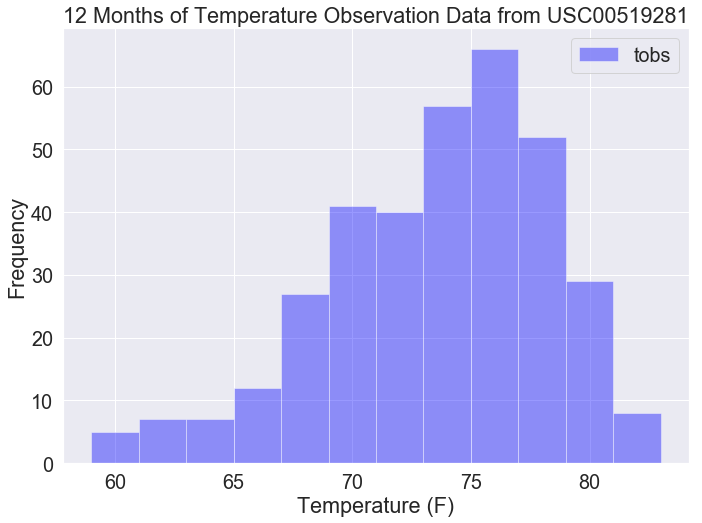

In [17]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#filter by the station with the highest number of observations

temp_data_highest_obs = session.query(Measurement.tobs).filter(Measurement.date > previous_year).\
    filter(Measurement.station == most_obs_station).all()

#make the font scale larger
sns.set(font_scale=1.8)

#set the plot size
plt.figure(figsize=(10,8))

#plot the results as a histogram with bins=1

year_tobs_hist = sns.distplot(temp_data_highest_obs, bins=12, kde=False, axlabel='Temperature (F)', label='tobs', color='blue')

#label the y axis
year_tobs_hist.set(ylabel='Frequency')

#set the title - is this needed?
plt.title(f'12 Months of Temperature Observation Data from {most_obs_station}')

plt.legend()
plt.show()

In [18]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example 
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [20]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
#write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d 
    #and return the minimum, average, and maximum temperatures for that range of dates

#identify trip dates with data range
start_date = '2012-02-28'
end_date = '2012-03-05'

def calc_temps(start, end):
    temps = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                          filter(Measurement.date >= start).filter(Measurement.date <= end).all()

    #pull out the values
    temp_min, temp_avg, temp_max = temps[0]
    
    #return a list
    return [('Trip Min Temp', temp_min), ('Trip Avg Temp', temp_avg), ('Trip Max Temp', temp_max)]



#make a dataframe
temps_df = pd.DataFrame(calc_temps(start_date,end_date), columns = ['Title', 'Temp (F)'])

temps_df

,Title,Temp (F)
0,Trip Min Temp,62.000000
1,Trip Avg Temp,69.571429
2,Trip Max Temp,74.000000


In [21]:
calc_temps('2012-02-28','2012-03-05' )

[('Trip Min Temp', 62.0),
 ('Trip Avg Temp', 69.57142857142857),
 ('Trip Max Temp', 74.0)]

In [22]:
#make sure it's in order
temps_df.sort_values(by=['Temp (F)'])

#calculate the year 
max_min = temps_df.iloc[2][1] - temps_df.iloc[0][1]
max_min

12.0

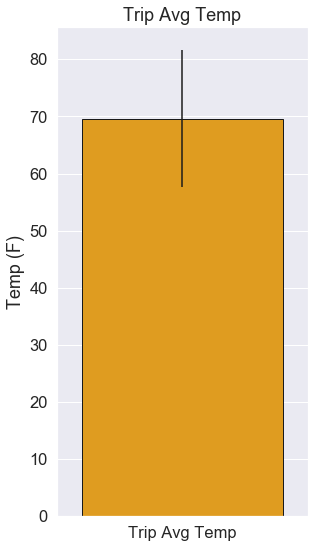

In [23]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr) ??


#make the font scale larger
sns.set(font_scale=1.5)

#set the plot size
plt.figure(figsize=(4,9))

#plot
sns.barplot(x='Title', y='Temp (F)', data=temps_df.iloc[1:2], color='orange', 
                  yerr=max_min, edgecolor='k', linewidth=1)

#make the title
plt.title('Trip Avg Temp')
          
#remove the x label
plt.xlabel('')
plt.show()

In [26]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation 


Rainfall_station = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)).\
filter(Measurement.date >= start_date).\
filter(Measurement.date <= end_date).group_by(Station.station).order_by(func.sum(Measurement.prcp).desc()).all()
print(Rainfall_station)


Rainfall_station_df = pd.DataFrame(Rainfall_station, columns=['Station', 'Name', 'Latitude', 'Longitude', 'Elevation', 'Precipitation'])

Rainfall_station_df

[('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 35.92000000000001), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 35.92000000000001), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 35.92000000000001), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 35.92000000000001), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 35.92000000000001), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 35.92000000000001), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 35.92000000000001), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 35.92000000000001), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 35.92000000000001)]


,Station,Name,Latitude,Longitude,Elevation,Precipitation
0,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,35.92
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,35.92
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,35.92
3,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,35.92
4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,35.92
5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,35.92
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,35.92
7,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,35.92
8,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,35.92
